In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\DRG\Desktop\jupyter notebook\Potuguesebank.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#checking null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
#encoding categorical values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns = df.select_dtypes(include = 'object').columns

In [7]:
columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [8]:
for col in columns:
    df[col] = le.fit_transform(df[col])

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [10]:
#splitting the data into training and testing

from sklearn.model_selection import train_test_split

X = df.drop(columns = 'y', axis = 1)
y  = df['y']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
#training decision tree model
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 3)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [13]:
#predicting column ' y' values with the model
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8872014155116484


In [15]:
confusion_matrix(y_test,y_pred)

array([[11705,   261],
       [ 1269,   329]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

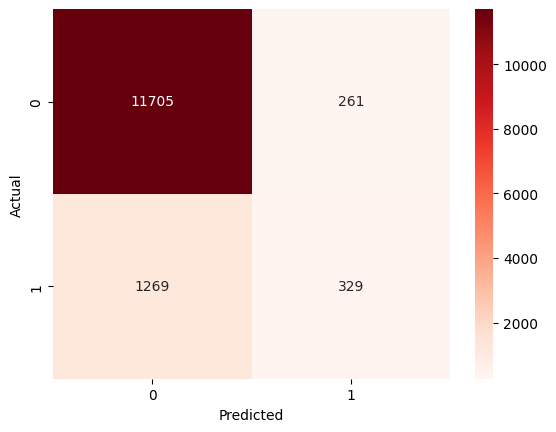

In [16]:
sns.heatmap(confusion_matrix(y_test,y_pred), cmap='Reds', annot = True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')

Conclusion:
The model performs well on the negative class (no subscription) but struggles with the positive class (subscription).
The high number of False Negatives indicates that the model is failing to correctly identify customers who actually subscribed.

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.56      0.21      0.30      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.59      0.62     13564
weighted avg       0.86      0.89      0.86     13564



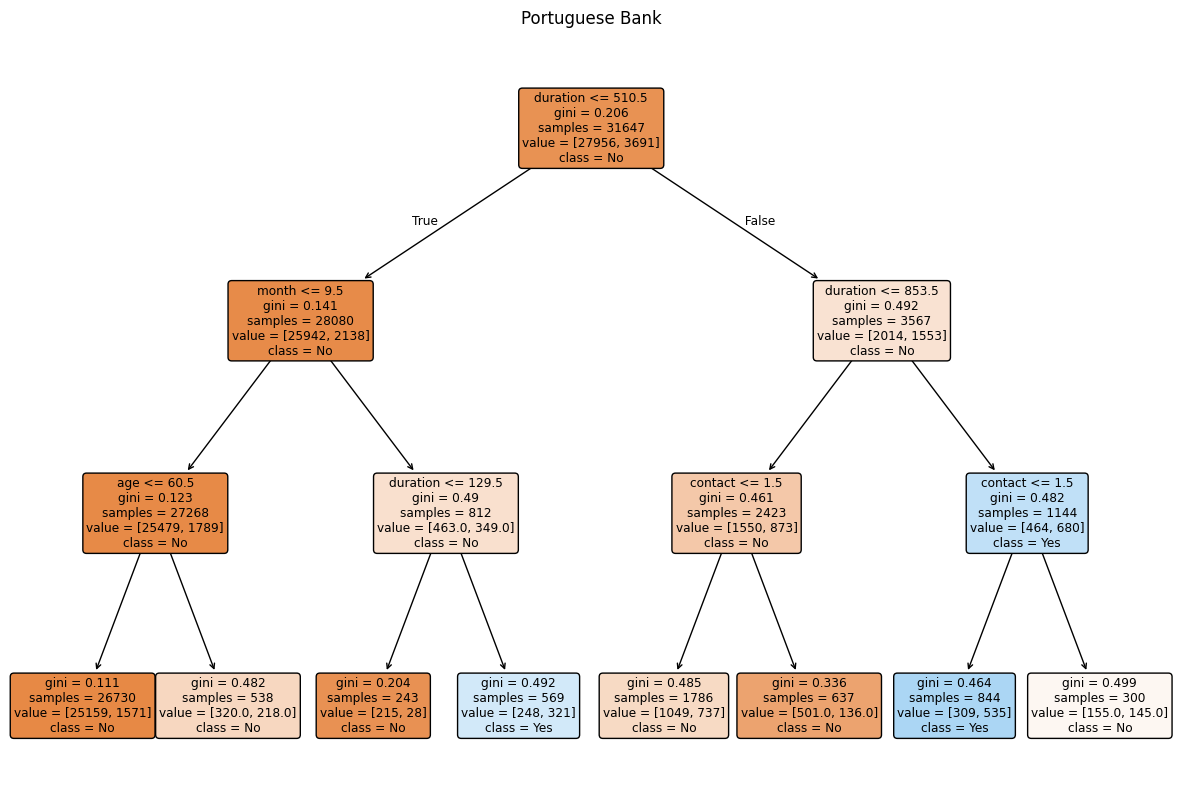

In [18]:
plt.figure(figsize=(15,10))
tree.plot_tree(model, filled = True, feature_names = X.columns, class_names = ['No', 'Yes'], rounded = True)
plt.title('Portuguese Bank')
plt.show()